In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fit_functions as f
import data_analysis_functions as d

In [2]:
import pathlib

In [3]:
def gen_path(path_string):
    '''Input string should be an absolute filepath. Generates a pathlib filepath from the string'''
    path = pathlib.Path(path_string)
    return path

In [4]:
def import_raw_data_PXI(filepath,header_lines = 30):
    '''Imports raw traces from data columns in single PXI text file.
    Input is file path.'''
    try:
        arr = np.genfromtxt(filepath,delimiter='', skip_header = header_lines)
        raw_data = [ch for ch in arr.T]
    except ValueError:
        print('Issues with file located at: ',filepath)
        raw_data = [np.zeros(10000),np.zeros(10000)]
    except OSError:
        print('Issues with file located at: ',filepath)
        raw_data = [np.zeros(10000),np.zeros(10000)]
    return raw_data

In [5]:
def read_raw_file(path_str,print_bool=False):
    '''From a single file location, obtain dataset with raw data and metadata.
    For full info, see documentation of process_single_data_file().
    '''
    filepath = gen_path(path_str)
    if print_bool:
        print(filepath)
    data = import_raw_data_PXI(filepath)
    meta = import_metadata_PXI(filepath)
    return [data,meta]

In [16]:
def split_strip(string):
    return string.split(':')[-1].strip(';')

def import_metadata_PXI(filepath):
    '''Import metadata parameters from Cleverscope file.

    Parameters returned as dict:
    dt: time step of data traces (ms)
    start: start time of data traces, relative to trigger (ms)
    nsample: number of elements in time series
    trigtime: UNIX time of trigger
    '''
    with open(filepath, 'r') as f:
        lines=[]
        for i in range(30):
            lines.append(f.readline().strip('\n'))
    meta={}
    for text in lines:
        if 'cycle number' in text:
            meta['cycle number'] = int(split_strip(text))
        if 'iteration' in text:
            meta['iteration'] = int(split_strip(text))
        if 'command file' in text: 
            #note the path usually also includes a ':', so split_strip() will just drop the drive in the path
            meta['command file'] = split_strip(text)
        if 'comment' in text:
            meta['comment'] = text.split(':')[1]
        if 'wavenumber' in text:
            if '(cm-1):' in text:
                meta['frequency'] = float(text.split('(cm-1):')[-1].strip(';'))
            else:
                meta['frequency'] = float(text.split('(cm-1)')[-1].strip(';'))
        if 'Channels' in text:
            meta['channels'] = int(text.strip('\t').split('\t')[-1])
        if 'Samples' in text:
            meta['samples'] = [int(x) for x in text.strip('Samples').strip('\t').split('\t')]
        if 'Time' in text:
            meta['trigtime'] = text.strip('Time').strip('\t').split('\t')
        if 'Delta_X' in text:
            meta['dt'] = [float(x) for x in text.strip('Delta_X').strip('\t').split('\t')]
        if 'X0' in text:
            meta['t0'] = [float(x) for x in text.strip('X0').strip('\t').split('\t')]
#     params={}
#     for text in lines:
#         if 'delta' in text:
#             dt_ms = np.round(float(text.split('\t')[1].strip())*10**3,decimals=6)
#             params['dt']=dt_ms
#         elif 'start' in text:
#             start_ms = np.round(float(text.split('\t')[1].strip())*10**3,decimals = 6)
#             params['start']=start_ms
#         elif 'nsample' in text:
#             nsample = int(float(text.split('\t')[1].strip()))
#             params['nsample']=nsample
#         elif 'TriggerTime' in text:
#             # The time is given as the number of days since 12/29/1899 11:00:00 UTC
#             # We can convert this to UNIX by subtracting 2209208400 seconds
#             # Ask Arian if you are curious
#             time_sec = float(text.split('\t')[1].strip())*24*3600 #convert days to seconds
#             time_unix = time_sec - 2209208400
#             params['trigtime']=time_unix
    return meta,lines

In [25]:
#path = r'C:\Users\main\OrangeBeamSource\Arian\20200108\raw\bendingscan11_1_001.txt'
path = r'E:\Dropbox (Hutzler Lab)\HutzlerLabData\Orange Beam Source\PXI Data\20200108\raw'
print(path)

E:\Dropbox (Hutzler Lab)\HutzlerLabData\Orange Beam Source\PXI Data\20200108\raw


In [20]:
data,[meta,l] = read_raw_file(path)

In [21]:
meta['comment']

'channel 1 is YbOH ground; channel 2 is Yb; channel 3 is YbOH bending;'

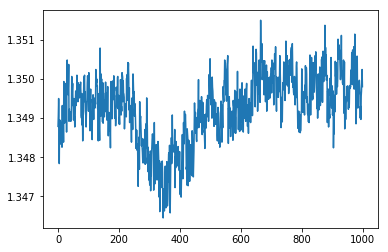

In [23]:
plt.plot(data[2])

In [26]:
gen_data_filepath(path,2,'bendingscan_1_')

WindowsPath('E:/Dropbox (Hutzler Lab)/HutzlerLabData/Orange Beam Source/PXI Data/20200108/raw/bendingscan_1_2.txt')

In [28]:
format(5,'03d')

'005'